In [45]:
pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [47]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [50]:
with_mask=os.listdir('/content/data/with_mask')


In [51]:
without_mask=os.listdir('/content/data/without_mask')

In [52]:
print('number of with mask elemets', len(with_mask))

number of with mask elemets 3725


In [53]:
print('number of with out mask elemets', len(without_mask))

number of with out mask elemets 3828


In [54]:
with_mask_lable=[1]*3725
without_mask_lable=[0]*3828

In [55]:
lables=without_mask_lable+with_mask_lable

In [56]:
len(lables)

7553

In [57]:
print(lables[0:5])
print(lables[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


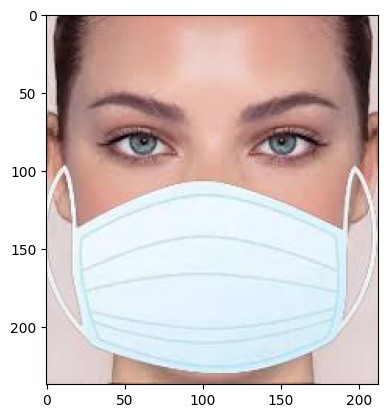

In [58]:
img = mpimg.imread('/content/data/with_mask/with_mask_1546.jpg')
imgplot = plt.imshow(img)
plt.show()

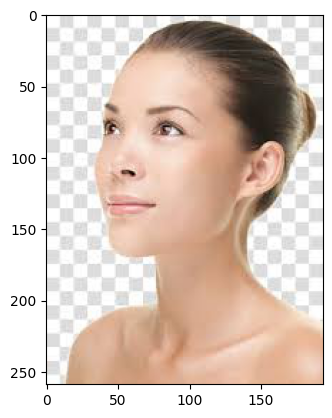

In [59]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [60]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [61]:
type(data[0])

numpy.ndarray

In [62]:
len(data)

7553

In [63]:
x=np.array(data)


In [64]:
len(x)
x.shape

(7553, 128, 128, 3)

In [65]:

y=np.array(lables)
len(y)

7553

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [67]:
x_train.shape,x_test.shape,x.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (7553, 128, 128, 3))

In [68]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [69]:
x_test_scaled[0]

array([[[0.10196078, 0.09803922, 0.07843137],
        [0.10196078, 0.09803922, 0.07843137],
        [0.10980392, 0.10588235, 0.08627451],
        ...,
        [0.09803922, 0.08627451, 0.06666667],
        [0.09411765, 0.08235294, 0.0627451 ],
        [0.09411765, 0.08235294, 0.0627451 ]],

       [[0.10980392, 0.10588235, 0.08627451],
        [0.10980392, 0.10588235, 0.08627451],
        [0.10980392, 0.10588235, 0.08627451],
        ...,
        [0.09803922, 0.08627451, 0.06666667],
        [0.09803922, 0.08627451, 0.06666667],
        [0.09411765, 0.08235294, 0.0627451 ]],

       [[0.10980392, 0.10588235, 0.08627451],
        [0.10980392, 0.10588235, 0.08627451],
        [0.10588235, 0.10196078, 0.08235294],
        ...,
        [0.09803922, 0.09019608, 0.07058824],
        [0.09803922, 0.08627451, 0.06666667],
        [0.09411765, 0.08235294, 0.0627451 ]],

       ...,

       [[0.87058824, 0.84313725, 0.78039216],
        [0.86666667, 0.83921569, 0.77647059],
        [0.8627451 , 0

In [70]:
x_train_scaled[0]


array([[[0.84705882, 0.80784314, 0.83137255],
        [0.85882353, 0.81176471, 0.83137255],
        [0.87843137, 0.81568627, 0.82745098],
        ...,
        [0.38823529, 0.20392157, 0.1254902 ],
        [0.4       , 0.21568627, 0.1372549 ],
        [0.40392157, 0.21960784, 0.14117647]],

       [[0.85882353, 0.81568627, 0.83529412],
        [0.86666667, 0.81568627, 0.82745098],
        [0.8745098 , 0.80392157, 0.81176471],
        ...,
        [0.37647059, 0.19215686, 0.11372549],
        [0.38823529, 0.20392157, 0.1254902 ],
        [0.39215686, 0.20784314, 0.12941176]],

       [[0.87843137, 0.82352941, 0.83921569],
        [0.88235294, 0.81960784, 0.83137255],
        [0.89411765, 0.80392157, 0.81568627],
        ...,
        [0.36862745, 0.18431373, 0.10588235],
        [0.37254902, 0.18823529, 0.10980392],
        [0.37647059, 0.19215686, 0.11372549]],

       ...,

       [[0.71764706, 0.45490196, 0.25882353],
        [0.71372549, 0.45490196, 0.25882353],
        [0.71372549, 0

In [71]:
import tensorflow as tf
from tensorflow import keras

In [72]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [73]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [74]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 5s 19ms/step - loss: 0.4596 - acc: 0.8050 - val_loss: 0.3065 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3278 - acc: 0.8701 - val_loss: 0.3173 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2861 - acc: 0.8876 - val_loss: 0.2606 - val_acc: 0.8876
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2402 - acc: 0.9047 - val_loss: 0.2954 - val_acc: 0.8860
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2133 - acc: 0.9185 - val_loss: 0.2629 - val_acc: 0.9074


In [75]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2442 - acc: 0.9146
Test Accuracy = 0.9146260619163513


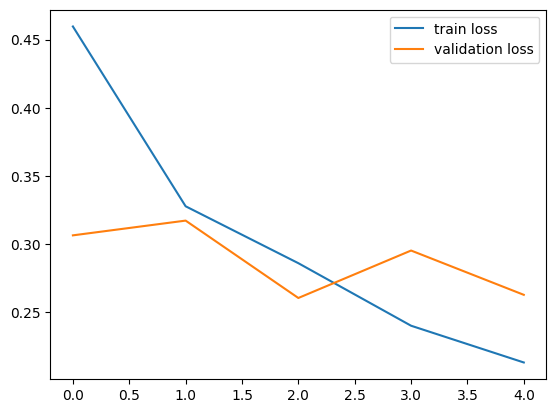

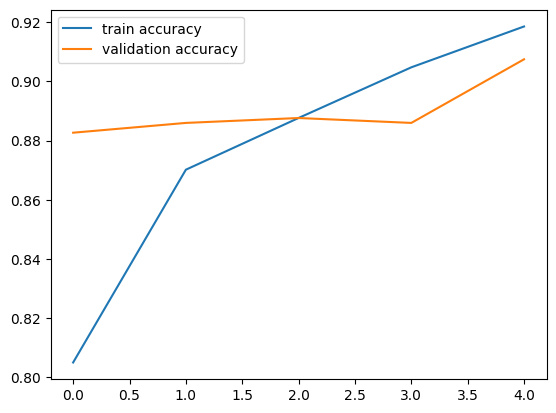

In [76]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_1002.jpg


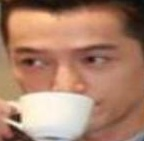

1/1 [==============================] - 0s 27ms/step
[[0.6649091  0.19848165]]
0
The person in the image is wearing a mask


In [83]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label < 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')